In [20]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 

In [13]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)
X

array([[-1.07816119e+00,  6.33677205e-02],
       [ 9.39808593e-01,  4.57119499e-01],
       [ 6.95151435e-01,  6.42107065e-01],
       [ 1.15017340e+00, -3.47871030e-01],
       [ 2.49173156e-01, -6.85441065e-02],
       [ 3.21945347e-01,  2.50622341e-01],
       [-7.12153032e-01,  8.26110194e-01],
       [ 1.53159481e+00, -1.57287449e-01],
       [ 1.95746563e+00, -8.16557590e-02],
       [ 1.43686490e-01,  9.34990547e-01],
       [-4.02636990e-01,  6.82594373e-01],
       [ 1.93843382e+00, -1.50881031e-01],
       [ 1.56535331e+00, -4.05593970e-01],
       [-8.44292755e-01,  4.85332130e-01],
       [ 1.86259670e+00,  1.82487734e-01],
       [ 1.92262353e+00, -6.38203855e-02],
       [-2.23689403e-04,  1.35967685e+00],
       [ 1.03057631e+00, -5.27734784e-01],
       [-1.07398963e+00,  6.92286480e-01],
       [-3.59010542e-01,  7.02497931e-01],
       [ 3.68912089e-01, -7.51839194e-03],
       [ 9.07792617e-01,  6.13306951e-01],
       [ 9.78643036e-01, -6.81395573e-01],
       [-8.

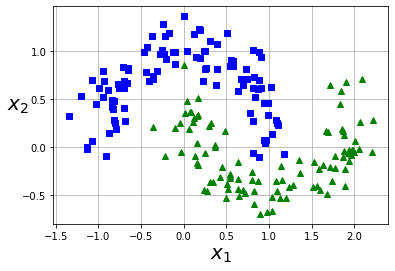

In [17]:
def plot_moons():
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
    plt.show()
    
plot_moons()

In [95]:
poly_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
poly_svm_clf.fit(X, y)

C:\Users\VGeorgiev\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


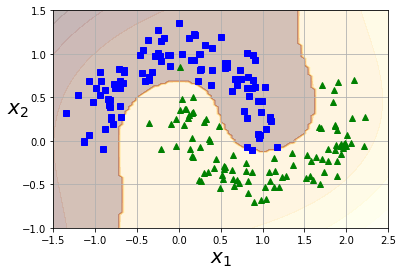

In [96]:
def plot_decision_function(poly_svm_clf):
    axes =  [-1.5, 2.5, -1, 1.5]
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xs = np.c_[x0.ravel(), x1.ravel()]
    #Xs = np.c_[x0s, x1s]
    
    y_pred = poly_svm_clf.predict(Xs).reshape(x0.shape)
    y_decision = poly_svm_clf.decision_function(Xs).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.afmhot, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.afmhot, alpha=0.1)
    print(y_pred)
        
        
plot_decision_function(poly_svm_clf)
plot_moons()

In [ ]:
y_de